In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date, datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = os.path.abspath("").split("\\")[:-1]
csv_path = "/".join(directory + ["03_Process", "Clean_Cyclistic_Data.csv"])

df = pd.read_csv(csv_path, index_col=0)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,start_hour,season,month
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,N Clark St & W Elm St,Streeter Dr & Grand Ave,41.900000,-87.630000,41.892278,-87.612043,casual,12.400000,6,11:00,spring,5
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,DIVVY CASSETTE REPAIR MOBILE STATION,Museum of Science and Industry,41.880958,-87.616743,41.791728,-87.583945,casual,44.916667,6,11:00,spring,5
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Milwaukee Ave & Fullerton Ave,Milwaukee Ave & Fullerton Ave,41.920000,-87.700000,41.920000,-87.700000,casual,1.200000,6,14:00,spring,5
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Milwaukee Ave & Fullerton Ave,Rockwell St & Fletcher St,41.920000,-87.700000,41.940000,-87.690000,casual,15.216667,6,14:00,spring,5
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Rockwell St & Fletcher St,Elston Ave & Henderson St,41.940000,-87.690000,41.940000,-87.700000,casual,6.883333,6,18:00,spring,5


In [4]:
# number of members vs number of riders

df["member_casual"].value_counts()

member    3220186
casual    2532599
Name: member_casual, dtype: int64

## Ride Length (time)

Across the year and all rideable types, casual riders ride, on average, for almost 
twice as long as members. Casual riders ride longer on every rideable type and 
all throughout the year.

In [5]:
# average ride_length of members vs casuals

df.groupby("member_casual")["ride_length"].mean()

member_casual
casual    29.041099
member    12.899898
Name: ride_length, dtype: float64

In [6]:
# distribution of ride_length, member vs casual

df.groupby("member_casual").ride_length.describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2532599.0,29.041099,233.284842,0.0,8.816667,15.550000,28.400000,55944.150000
member,3220186.0,12.899898,20.117306,0.0,5.333333,9.183333,15.916667,1499.933333


In [7]:
# 1% trimmmed average ride_length for members and casuals

avg_trimmed_members = stats.trim_mean(df[df["member_casual"] == "member"].ride_length, 0.01)
avg_trimmed_casuals = stats.trim_mean(df[df["member_casual"] == "casual"].ride_length, 0.01)

print(f"members: {avg_trimmed_members}\ncasuals: {avg_trimmed_casuals}")

members: 11.994285038731002
casuals: 23.313622640916478


In [8]:
# ride length by season

avg_trimmed_winter = stats.trim_mean(df[df["season"] == "winter"].ride_length, 0.01)
avg_trimmed_spring = stats.trim_mean(df[df["season"] == "spring"].ride_length, 0.01)
avg_trimmed_summer = stats.trim_mean(df[df["season"] == "summer"].ride_length, 0.01)
avg_trimmed_autumn = stats.trim_mean(df[df["season"] == "autumn"].ride_length, 0.01)

print(f"winter: {avg_trimmed_winter}\nspring: {avg_trimmed_spring}\nsummer: {avg_trimmed_summer}\nautumn: {avg_trimmed_autumn}")

winter: 12.562520737823027
spring: 18.203198484203757
summer: 18.30887208849457
autumn: 13.600595573740813


In [9]:
# average ride length (time) by season by membership status

for status in ["casual", "member"]:
    avg_trimmed_winter = stats.trim_mean(df[(df["season"] == "winter") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_spring = stats.trim_mean(df[(df["season"] == "spring") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_summer = stats.trim_mean(df[(df["season"] == "summer") & (df["member_casual"] == status)].ride_length, 0.01)
    avg_trimmed_autumn = stats.trim_mean(df[(df["season"] == "autumn") & (df["member_casual"] == status)].ride_length, 0.01)

    print(f"""{status}: 
        winter: {avg_trimmed_winter}
        spring: {avg_trimmed_spring}
        summer: {avg_trimmed_summer}
        autumn: {avg_trimmed_autumn}\n""")

casual: 
        winter: 19.69543090430399
        spring: 26.029165186007905
        summer: 23.96237471890435
        autumn: 18.966652960943758

member: 
        winter: 10.434350367627582
        spring: 12.44557051177263
        summer: 12.961584617959424
        autumn: 10.905228603364469



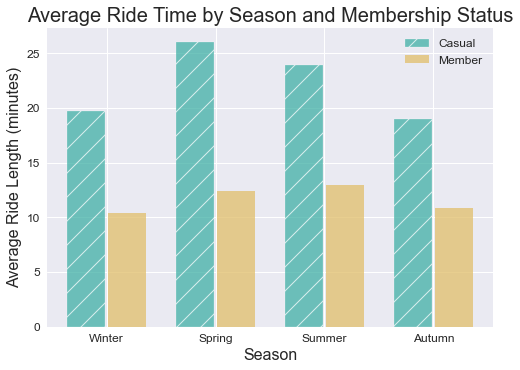

In [88]:
szn_avg_cas = [19.69543090430399, 26.029165186007905, 23.96237471890435, 18.966652960943758]
szn_avg_mem = [10.434350367627582, 12.44557051177263, 12.961584617959424, 10.905228603364469]
width = 0.35
x = np.arange(len(szn_avg_cas))


plt.style.use("seaborn")
fig, ax = plt.subplots()
_ = ax.bar(
    x - (width/2 + 0.0125), szn_avg_cas, 
    color="#40B0A6", alpha=0.75, edgecolor="white", hatch="/", width=width,
    label="Casual")

_ = ax.bar(
    x + (width/2 + 0.0125), szn_avg_mem,
    color="#E1BE6A", alpha=0.75, width=width,
    label="Member")

_ = ax.set(
    xticks=x,
    xticklabels=["Winter", "Spring", "Summer", "Autumn"],
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_title("Average Ride Time by Season and Membership Status", fontsize=20)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_xlabel("Season", fontsize=16)
_ = ax.legend(prop={"size": 12})

# plt.savefig("figures/avg_ridelength_by_season_membership.png", dpi=600, format="png")

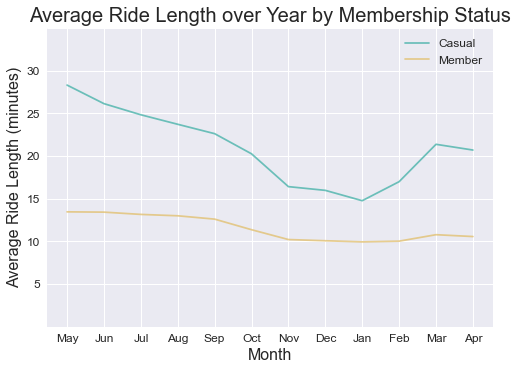

In [89]:
monthly_avg_cas = []
monthly_avg_mem = []
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]   # data is from may 2021-april 2022

for month in months:
    monthly_avg_cas.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "casual")].ride_length, 0.01))
    monthly_avg_mem.append(stats.trim_mean(df[(df["month"] == month) & (df["member_casual"] == "member")].ride_length, 0.01))

x = np.arange(len(monthly_avg_mem))

fig, ax = plt.subplots()
_ = ax.plot(x, monthly_avg_cas, color="#40B0A6", alpha=0.75, label="Casual")
_ = ax.plot(x, monthly_avg_mem, color="#E1BE6A", alpha=0.75, label="Member")

_ = ax.set(
    xticks=x,
    xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"],
    yticks=[0, 5, 10, 15, 20, 25, 30, 35],
    yticklabels=["", "5", "10", "15", "20", "25", "30", ""]
)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_xlabel("Month", fontsize=16)
_ = ax.set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = ax.set_title("Average Ride Length over Year by Membership Status", fontsize=20)
_ = ax.set_ylim(0)

_ = ax.legend(prop={"size": 12})

# plt.savefig("figures/avg_ridelength_overyear_by_membership.png", dpi=600, format="png")

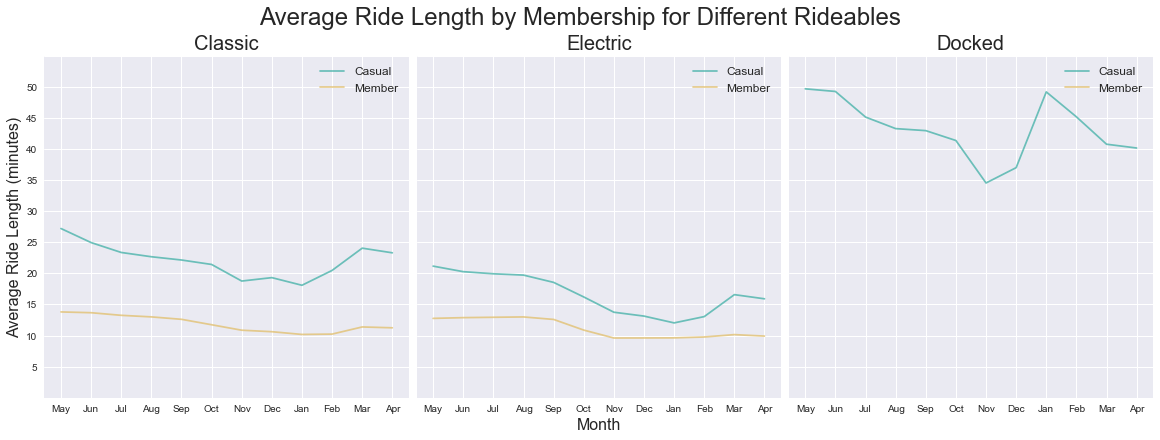

In [90]:
months = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]   # data is from may 2021-april 2022
rideables = df.rideable_type.value_counts().index

ls = []
for rideable in rideables:
    ls1 = []
    for status in ["member", "casual"]:
        ls2 = []
        for month in months:
            ls2.append(stats.trim_mean(df[(df["month"] == month)
                                        & (df["member_casual"] == status)
                                        & (df["rideable_type"] == rideable)].ride_length, 0.01))
        ls1.append(ls2)
    ls.append(ls1)
        

x = np.arange(len(months))

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, constrained_layout=True, figsize=(16, 6))

for i in range(len(axs)):
    _ = axs[i].plot(x, ls[i][1], color="#40B0A6", alpha=0.75, label="Casual")    
    _ = axs[i].plot(x, ls[i][0], color="#E1BE6A", alpha=0.75, label="Member")
    _ = axs[i].set(
        xticks=x,
        xticklabels=["May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr"],
        yticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
        yticklabels=["", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", ""]
    )
    _ = axs[i].set_title(rideables[i].split("_")[0].capitalize(), fontsize=20)

    _ = axs[i].legend(prop={"size": 12})

_ = axs[0].set_ylabel("Average Ride Length (minutes)", fontsize=16)
_ = axs[1].set_xlabel("Month", fontsize=16)

_ = fig.suptitle("Average Ride Length by Membership for Different Rideables", fontsize=24)


# plt.savefig("figures/avg_ridelength_over_year_by_membership_rideabletype.png", dpi=600, format="png")

## Rideable Types

Both groups ride electric bikes at almost identical rates but casual riders 
accounted for all but one of docked bike rides, this is what makes of the difference 
percentage-wise between the use of classic bikes between the groups.

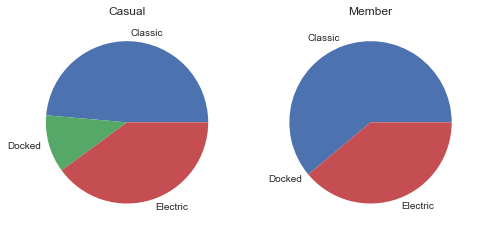

In [91]:
rideable_types_ct = pd.crosstab(df.member_casual, df.rideable_type)

fig, axs = plt.subplots(ncols=2)

for i in range(len(axs)):
    labels = ["Classic", "Docked", "Electric"]
    _ = axs[i].pie(rideable_types_ct.iloc[i],
        labels=labels)
    _ = axs[i].set_title(rideable_types_ct.iloc[i].name.capitalize())

# plt.savefig("figures/rideabletype_by_membership_piechart.png", dpi=600, format="png")

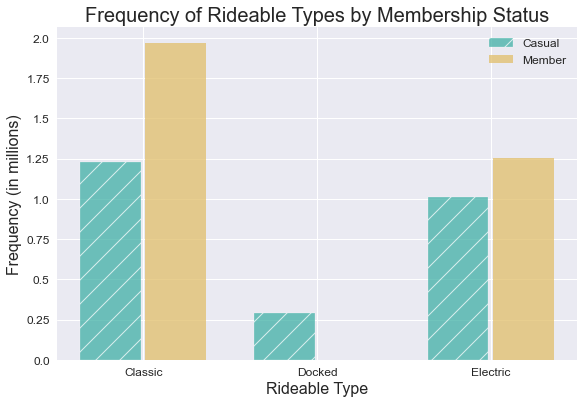

In [92]:
rideable_types_ct = pd.crosstab(df.member_casual, df.rideable_type)

x = np.arange(3)
width = 0.35
hspace = 0.0125

fig, ax = plt.subplots(constrained_layout=True)
_ = ax.bar(
    x - (width/2 + hspace), rideable_types_ct.loc["casual"],
    width=width, color="#40B0A6", alpha=0.75, edgecolor="white", hatch="/",
    label="Casual")
_ = ax.bar(
    x + (width/2 + hspace), rideable_types_ct.loc["member"], 
    width=width, color="#E1BE6A", alpha=0.75,
    label="Member")

_ = ax.set_xticks(x)
_ = ax.set_xticklabels(["Classic", "Docked", "Electric"])
_ = ax.set_yticks(np.arange(9)*250000)
_ = ax.set_yticklabels(np.arange(9)/4)
_ = ax.tick_params(axis="both", which="major", labelsize=12)
_ = ax.set_xlabel("Rideable Type", fontsize=16)
_ = ax.set_ylabel("Frequency (in millions)", fontsize=16)
_ = ax.set_title("Frequency of Rideable Types by Membership Status", fontsize=20)
_ = ax.legend(prop={"size": 12})


# plt.savefig("figures/barchart_rideabletypes_by_membership.png", dpi=600, format="png")

## Location

10.6% of casual riders end their ride at the same station it began compared to 
just 5.9% of members.

In [81]:
closed_path_cas = len(df[(df["member_casual"] == "casual") & (df["start_station_name"] == df["end_station_name"])])
closed_path_mem = len(df[(df["member_casual"] == "member") & (df["start_station_name"] == df["end_station_name"])])


# proportion of (casuals, members) who start and end their ride at the same station
closed_path_cas/df["member_casual"].value_counts()["casual"], closed_path_mem/df["member_casual"].value_counts()["member"]

(0.1059393926950141, 0.05949966865268031)

In [87]:
start_station_counts = df.groupby(["member_casual"]).start_station_name.value_counts()
start_station_counts.loc["member"], start_station_counts.loc["casual"]

(start_station_name
 University Ave & 57th St              59067
 Kingsbury St & Kinzie St              28751
 Ellis Ave & 60th St                   25734
 Clark St & Elm St                     24773
 Wells St & Concord Ln                 24007
                                       ...  
 St Louis Ave & 59th St                    7
 Western Ave & Lake St                     6
 Lavergne Ave & Division St                5
 Lincoln Ave & Roscoe St - Charging        3
 Albany Ave & Douglas Blvd                 2
 Name: start_station_name, Length: 864, dtype: int64,
 start_station_name
 Streeter Dr & Grand Ave                         73058
 Millennium Park                                 32576
 Michigan Ave & Oak St                           29019
 Shedd Aquarium                                  22919
 Theater on the Lake                             22475
                                                 ...  
 Albany Ave & Douglas Blvd                          16
 La Villita Park (Albany/3